In [72]:
import numpy as np
import pandas as pd
import sympy as sp
import Funciones_sismos as BN
from scipy.linalg import eig, eigh
import matplotlib.pyplot as plt

In [73]:
E = 3240964.04   #T/m^2
gdl = 26
col = 0.95   #m
num_col = 6
h = 3.6 #m
inercia_efectiva = 1
I = np.ones(gdl)*((col**4)/12)*inercia_efectiva #m**4
H = np.ones(gdl)*h #m
g = 9.81  #m/(s**2)
m_piso = 70/g #Tons
m = np.ones(gdl)*m_piso    #T*(s**2)*(m**-1)
r = np.ones(gdl)
coef_castigo = 1
tipo = 1
vector = 0

zona = 5
suelo = 'C'
fip = 0.9
fie = 0.8
fa = 1.2
fd = 1.11
fs = 1.11
n = 2.48
z = 0.4     #Para un TR475 años
Imp = 1.3   #Importancia
rr = 1
R = 7

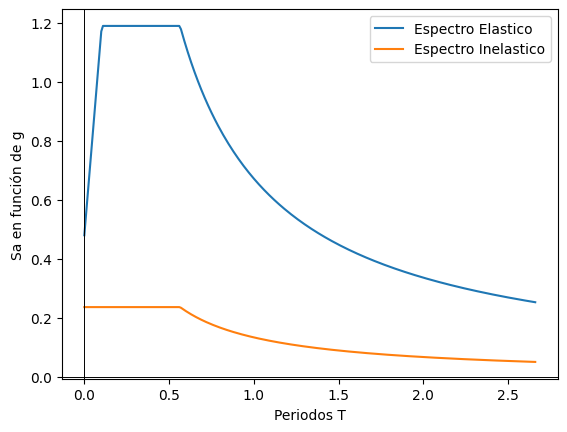

In [84]:
Spec, SpecI, Tmp = BN.Spec_NEC(n, z, fa, fd, fs, rr, Imp, R, fip, fie)

fig, ax = plt.subplots()
plt.plot(Tmp, Spec[:,0], label='Espectro Elastico')
plt.plot(Tmp, SpecI[:,0], label='Espectro Inelastico')
ax.axhline(0, color='black', linewidth=0.7)
ax.axvline(0, color='black', linewidth=0.7)
ax.set_xlabel('Periodos T')
ax.set_ylabel('Sa en función de g')
plt.legend()
plt.show()

In [87]:
tbl_SpecI = pd.DataFrame(SpecI)
#display(tbl_SpecI.style.set_caption('Sa_Espectro Inelastico'))

In [88]:
#Matrices de Masa y Rigidez

K, M, k = BN.K_M(num_col, H, E, tipo, I, vector, m, coef_castigo)
#print(k)
K_tbl = pd.DataFrame(K)
display(K_tbl.style.set_caption('Matriz de rigidez'))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,678957.167337,-339478.583668,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-339478.583668,678957.167337,-339478.583668,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,-339478.583668,678957.167337,-339478.583668,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,-339478.583668,678957.167337,-339478.583668,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,-339478.583668,678957.167337,-339478.583668,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,-339478.583668,678957.167337,-339478.583668,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,-339478.583668,678957.167337,-339478.583668,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-339478.583668,678957.167337,-339478.583668,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-339478.583668,678957.167337,-339478.583668,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-339478.583668,678957.167337,-339478.583668,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [89]:
M_tbl = pd.DataFrame(M)
display(M_tbl.style.set_caption('Matriz de masas (Tons)'))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,7.135576,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,7.135576,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,7.135576,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,7.135576,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,7.135576,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,7.135576,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.135576,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.135576,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.135576,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.135576,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [90]:
#EIGENVECTORES Y EIGENVALORES
# Minv = np.linalg.inv(M)
# A = Minv @ (K)
# V, D = eig(A)
# V = V.real
# D = np.transpose(D)
V, D = eigh(K, M)  #scipy
# K = np.array(K).astype(float)  #numpy
# M = np.array(M).astype(float)  #numpy
# V, D = np.linalg.eig(np.linalg.inv(M).dot(K))  #numpy

w = np.sqrt(V)
T = 2*np.pi/w

df_wTD = pd.DataFrame({'w': w, 'T': T, 'V': V})
display(df_wTD)

,w,T,V
0,12.927129,0.486046,167.110674
1,38.735981,0.162205,1500.476235
2,64.408771,0.097552,4148.489828
3,89.855323,0.069926,8073.979145
4,114.986255,0.054643,13221.838923
5,139.713294,0.044972,19519.804493
6,163.949584,0.038324,26879.466225
7,187.609996,0.033491,35197.510600
8,210.611421,0.029833,44357.170508
9,232.873065,0.026981,54229.864404


In [91]:
tbl_D = pd.DataFrame(D)
display(tbl_D.style.set_caption('Modos de vibracion:'))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.006093,-0.018192,-0.030036,0.041459,0.052299,-0.062406,-0.071636,0.079861,0.086964,-0.092847,-0.097427,0.100638,0.102437,-0.102798,-0.101717,0.099207,0.095304,-0.090064,-0.083559,0.075881,0.067139,-0.057453,-0.046961,0.035810,0.024157,-0.012164
1,0.012164,-0.035810,-0.057453,0.075881,0.090064,-0.099207,-0.102798,0.100638,0.092847,-0.079861,-0.062406,0.041459,0.018192,0.006093,0.030036,-0.052299,-0.071636,0.086964,0.097427,-0.102437,-0.101717,0.095304,0.083559,-0.067139,-0.046961,0.024157
2,0.018192,-0.052299,-0.079861,0.097427,0.102798,-0.095304,-0.075881,0.046961,0.012164,0.024157,0.057453,-0.083559,-0.099207,0.102437,0.092847,-0.071636,-0.041459,0.006093,-0.030036,0.062406,0.086964,-0.100638,-0.101717,0.090064,0.067139,-0.035810
3,0.024157,-0.067139,-0.095304,0.102437,0.086964,-0.052299,-0.006093,-0.041459,-0.079861,0.100638,0.099207,-0.075881,-0.035810,-0.012164,-0.057453,0.090064,0.102798,-0.092847,-0.062406,0.018192,-0.030036,0.071636,0.097427,-0.101717,-0.083559,0.046961
4,0.030036,-0.079861,-0.102437,0.090064,0.046961,0.012164,0.067139,-0.099207,-0.097427,0.062406,0.006093,0.052299,0.092847,-0.101717,-0.075881,0.024157,-0.035810,0.083559,0.102798,-0.086964,-0.041459,-0.018192,-0.071636,0.100638,0.095304,-0.057453
5,0.035810,-0.090064,-0.100638,0.062406,-0.006093,0.071636,0.102437,-0.083559,-0.024157,-0.046961,-0.095304,0.097427,0.052299,0.018192,0.079861,-0.102798,-0.075881,0.012164,-0.057453,0.099207,0.092847,-0.041459,0.030036,-0.086964,-0.101717,0.067139
6,0.041459,-0.097427,-0.090064,0.024157,-0.057453,0.101717,0.079861,-0.006093,0.071636,-0.102798,-0.067139,-0.012164,-0.083559,0.100638,0.052299,0.030036,0.092847,-0.095304,-0.035810,-0.046961,-0.099207,0.086964,0.018192,0.062406,0.102437,-0.075881
7,0.046961,-0.101717,-0.071636,-0.018192,-0.092847,0.090064,0.012164,0.075881,0.100638,-0.041459,0.052299,-0.102437,-0.067139,-0.024157,-0.095304,0.086964,0.006093,0.079861,0.099207,-0.035810,0.057453,-0.102798,-0.062406,-0.030036,-0.097427,0.083559
8,0.052299,-0.102798,-0.046961,-0.057453,-0.102437,0.041459,-0.062406,0.101717,0.035810,0.067139,0.100638,-0.030036,0.071636,-0.099207,-0.024157,-0.075881,-0.097427,0.018192,-0.079861,0.095304,0.012164,0.083559,0.092847,-0.006093,0.086964,-0.090064
9,0.057453,-0.100638,-0.018192,-0.086964,-0.083559,-0.024157,-0.101717,0.052299,-0.062406,0.099207,0.012164,0.090064,0.079861,0.030036,0.102437,-0.046961,0.067139,-0.097427,-0.006093,-0.092847,-0.075881,-0.035810,-0.102798,0.041459,-0.071636,0.095304


In [92]:
#Valor de aceleraciones espectrales correpondiente a T [Fracción de la gravedad]

Lw = np.zeros(len(T))
for i in range(len(T)):
    Lw[i] = D[:, i].T @ M @ r

df_Lw = pd.DataFrame(Lw, columns=["Lw"])
display(df_Lw)

,Lw
0,12.376715
1,-4.115900
2,-2.457917
3,1.743172
4,1.342813
5,-1.085326
6,-0.904737
7,0.770252
8,0.665563
9,-0.581222


In [93]:
#Factor de excitación sísmica modal

MT = np.sum(np.diag(M))
M_e = np.zeros(len(T))

for i in range(len(T)):
    M_e[i] = ((Lw[i]**2) / MT) * 100

df_M_e = pd.DataFrame(M_e)
display(df_M_e.style.set_caption('Masas efectivas'))

,0
0,82.567359
1,9.131185
2,3.256357
3,1.637866
4,0.971916
5,0.634918
6,0.441207
7,0.319789
8,0.238768
9,0.182088


In [94]:
#Masa efectiva [%]

M_eacum = []
M_eacum.append(M_e[0])

for i in range(len(T)-1):
    M_eacum.append(M_eacum[i] + M_e[i+1])

df_M_eacum = pd.DataFrame(M_eacum)
display(df_M_eacum.style.set_caption('Masas efectivas acumuladas'))

,0
0,82.567359
1,91.698544
2,94.954901
3,96.592767
4,97.564683
5,98.199601
6,98.640808
7,98.960597
8,99.199365
9,99.381453


In [95]:
#b = int(input("Número de modos de vibración para la superposición (ver M_eacum al 90%): "))

In [98]:
#Respuestas maximas modales
g = 9.8
qmax = np.zeros((gdl,gdl))
for i in range(gdl):
    qmax[:,i] = ((Lw[i]*SpecI[i,0]*g)/(V[i])*m_piso)*(D[:,i])

tbl_qmax = pd.DataFrame(qmax)
display(tbl_qmax.style.set_caption('qmax'))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.007453,0.000824,0.000294,0.000148,0.000088,0.000057,0.000040,0.000029,0.000022,0.000016,0.000013,0.000010,0.000008,0.000006,0.000005,0.000004,0.000003,0.000002,0.000002,0.000001,0.000001,0.000001,0.000000,0.000000,0.000000,0.000000
1,0.014879,0.001622,0.000562,0.000271,0.000151,0.000091,0.000057,0.000036,0.000023,0.000014,0.000008,0.000004,0.000001,-0.000000,-0.000001,-0.000002,-0.000002,-0.000002,-0.000002,-0.000002,-0.000001,-0.000001,-0.000001,-0.000000,-0.000000,-0.000000
2,0.022254,0.002369,0.000781,0.000347,0.000172,0.000088,0.000042,0.000017,0.000003,-0.000004,-0.000008,-0.000008,-0.000008,-0.000006,-0.000004,-0.000003,-0.000001,-0.000000,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000000,0.000000
3,0.029550,0.003042,0.000933,0.000365,0.000146,0.000048,0.000003,-0.000015,-0.000020,-0.000018,-0.000013,-0.000008,-0.000003,0.000001,0.000003,0.000003,0.000003,0.000002,0.000001,0.000000,-0.000000,-0.000001,-0.000001,-0.000001,-0.000000,-0.000000
4,0.036742,0.003618,0.001002,0.000321,0.000079,-0.000011,-0.000037,-0.000036,-0.000024,-0.000011,-0.000001,0.000005,0.000007,0.000006,0.000004,0.000001,-0.000001,-0.000002,-0.000002,-0.000001,-0.000001,0.000000,0.000001,0.000001,0.000000,0.000000
5,0.043805,0.004080,0.000985,0.000223,-0.000010,-0.000066,-0.000057,-0.000030,-0.000006,0.000008,0.000012,0.000010,0.000004,-0.000001,-0.000004,-0.000004,-0.000002,-0.000000,0.000001,0.000002,0.000001,0.000000,-0.000000,-0.000001,-0.000000,-0.000000
6,0.050715,0.004414,0.000881,0.000086,-0.000096,-0.000093,-0.000044,-0.000002,0.000018,0.000018,0.000009,-0.000001,-0.000006,-0.000006,-0.000003,0.000001,0.000003,0.000002,0.000001,-0.000001,-0.000001,-0.000001,-0.000000,0.000000,0.000000,0.000000
7,0.057446,0.004608,0.000701,-0.000065,-0.000156,-0.000083,-0.000007,0.000027,0.000025,0.000007,-0.000007,-0.000010,-0.000005,0.000001,0.000005,0.000003,0.000000,-0.000002,-0.000002,-0.000001,0.000001,0.000001,0.000001,-0.000000,-0.000000,-0.000000
8,0.063976,0.004657,0.000460,-0.000205,-0.000172,-0.000038,0.000035,0.000037,0.000009,-0.000012,-0.000013,-0.000003,0.000005,0.000006,0.000001,-0.000003,-0.000003,-0.000000,0.000002,0.000002,0.000000,-0.000001,-0.000001,-0.000000,0.000000,0.000000
9,0.070280,0.004559,0.000178,-0.000310,-0.000140,0.000022,0.000057,0.000019,-0.000015,-0.000018,-0.000002,0.000009,0.000006,-0.000002,-0.000005,-0.000002,0.000002,0.000002,0.000000,-0.000002,-0.000001,0.000000,0.000001,0.000000,-0.000000,-0.000000


In [100]:
#Fuerzas Elásticas Máximas Modales ("Tiene Unidad")
Qmax = np.zeros((gdl,gdl))
for i in range(gdl):
    Qmax[:,i] = (Lw[i]*SpecI[i,0]*g*D[:,i])

tbl_qmax = pd.DataFrame(Qmax)
display(tbl_qmax.style.set_caption('Qmax'))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.174538,0.173314,0.170884,0.167280,0.162555,0.156773,0.150017,0.142382,0.133973,0.124910,0.115320,0.105337,0.095102,0.084758,0.074450,0.064323,0.054519,0.045176,0.036425,0.028389,0.021180,0.014901,0.009638,0.005466,0.002444,0.000613
1,0.348464,0.341163,0.326867,0.306171,0.279933,0.249224,0.215277,0.179426,0.143036,0.107439,0.073867,0.043394,0.016889,-0.005023,-0.021984,-0.033909,-0.040979,-0.043621,-0.042470,-0.038324,-0.032089,-0.024717,-0.017149,-0.010248,-0.004751,-0.001218
2,0.521165,0.498251,0.454347,0.393103,0.319515,0.239420,0.158908,0.083726,0.018739,-0.032499,-0.068005,-0.087461,-0.092102,-0.084460,-0.067958,-0.046447,-0.023717,-0.003056,0.013093,0.023347,0.027435,0.026101,0.020876,0.013747,0.006792,0.001805
3,0.692036,0.639625,0.542210,0.413321,0.270299,0.131384,0.012759,-0.073916,-0.123030,-0.135392,-0.117427,-0.079425,-0.033246,0.010029,0.042052,0.058395,0.058806,0.046572,0.027204,0.006806,-0.009476,-0.018579,-0.019995,-0.015526,-0.008453,-0.002367
4,0.860476,0.760826,0.582793,0.363395,0.145964,-0.030557,-0.140599,-0.176873,-0.150091,-0.083956,-0.007211,0.054741,0.086198,0.083865,0.055540,0.015662,-0.020485,-0.041913,-0.044812,-0.032535,-0.013079,0.004718,0.014702,0.015362,0.009641,0.002896
5,1.025893,0.858032,0.572557,0.251798,-0.018937,-0.179961,-0.214521,-0.148976,-0.037215,0.063179,0.112808,0.101976,0.048554,-0.014999,-0.058453,-0.066651,-0.043408,-0.006101,0.025045,0.037115,0.029291,0.010752,-0.006164,-0.013274,-0.010290,-0.003384
6,1.187707,0.928176,0.512396,0.097468,-0.178574,-0.255529,-0.167241,-0.010862,0.110359,0.138298,0.079470,-0.012732,-0.077575,-0.082977,-0.038279,0.019475,0.053113,0.047805,0.015610,-0.017569,-0.031297,-0.022554,-0.003734,0.009526,0.010363,0.003825
7,1.345349,0.969047,0.407555,-0.073402,-0.288584,-0.226255,-0.025473,0.135287,0.155039,0.055776,-0.061905,-0.107220,-0.062331,0.019917,0.069756,0.056385,0.003485,-0.040058,-0.043246,-0.013397,0.018125,0.026661,0.012808,-0.004585,-0.009856,-0.004212
8,1.498266,0.979355,0.267176,-0.231816,-0.318392,-0.104151,0.130687,0.181348,0.055168,-0.090324,-0.119122,-0.031439,0.066506,0.081796,0.017681,-0.049199,-0.055733,-0.009125,0.034813,0.035655,0.003837,-0.021671,-0.019055,-0.000930,0.008797,0.004539
9,1.645920,0.958775,0.103499,-0.350889,-0.259716,0.060685,0.213011,0.093243,-0.096139,-0.133466,-0.014398,0.094269,0.074142,-0.024765,-0.074977,-0.030448,0.038407,0.048869,0.002656,-0.034736,-0.023939,0.009288,0.021098,0.006328,-0.007247,-0.004804


In [101]:
#Superposición modal
#SRSS(Raíz cuadrada de la suma de los cuadrados)  &  #ABS(Suma)
b = gdl
SR = np.zeros((gdl,b))
abz = np.zeros((gdl,b))
for i in range(gdl):
    for j in range(b):
        SR[i,j] = (Qmax[i,j]**2) + SR[i,j]
        abz[i,j] = np.abs(Qmax[i,j]) + abz[i,j]

SRSS = np.sqrt(SR)
aux33 = [abz,SRSS]

tbl_abz = pd.DataFrame(abz)
tbl_SRSS = pd.DataFrame(SRSS)
display(tbl_abz.style.set_caption("ABZ"))
display(tbl_SRSS.style.set_caption("SRSS"))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.174538,0.173314,0.170884,0.167280,0.162555,0.156773,0.150017,0.142382,0.133973,0.124910,0.115320,0.105337,0.095102,0.084758,0.074450,0.064323,0.054519,0.045176,0.036425,0.028389,0.021180,0.014901,0.009638,0.005466,0.002444,0.000613
1,0.348464,0.341163,0.326867,0.306171,0.279933,0.249224,0.215277,0.179426,0.143036,0.107439,0.073867,0.043394,0.016889,0.005023,0.021984,0.033909,0.040979,0.043621,0.042470,0.038324,0.032089,0.024717,0.017149,0.010248,0.004751,0.001218
2,0.521165,0.498251,0.454347,0.393103,0.319515,0.239420,0.158908,0.083726,0.018739,0.032499,0.068005,0.087461,0.092102,0.084460,0.067958,0.046447,0.023717,0.003056,0.013093,0.023347,0.027435,0.026101,0.020876,0.013747,0.006792,0.001805
3,0.692036,0.639625,0.542210,0.413321,0.270299,0.131384,0.012759,0.073916,0.123030,0.135392,0.117427,0.079425,0.033246,0.010029,0.042052,0.058395,0.058806,0.046572,0.027204,0.006806,0.009476,0.018579,0.019995,0.015526,0.008453,0.002367
4,0.860476,0.760826,0.582793,0.363395,0.145964,0.030557,0.140599,0.176873,0.150091,0.083956,0.007211,0.054741,0.086198,0.083865,0.055540,0.015662,0.020485,0.041913,0.044812,0.032535,0.013079,0.004718,0.014702,0.015362,0.009641,0.002896
5,1.025893,0.858032,0.572557,0.251798,0.018937,0.179961,0.214521,0.148976,0.037215,0.063179,0.112808,0.101976,0.048554,0.014999,0.058453,0.066651,0.043408,0.006101,0.025045,0.037115,0.029291,0.010752,0.006164,0.013274,0.010290,0.003384
6,1.187707,0.928176,0.512396,0.097468,0.178574,0.255529,0.167241,0.010862,0.110359,0.138298,0.079470,0.012732,0.077575,0.082977,0.038279,0.019475,0.053113,0.047805,0.015610,0.017569,0.031297,0.022554,0.003734,0.009526,0.010363,0.003825
7,1.345349,0.969047,0.407555,0.073402,0.288584,0.226255,0.025473,0.135287,0.155039,0.055776,0.061905,0.107220,0.062331,0.019917,0.069756,0.056385,0.003485,0.040058,0.043246,0.013397,0.018125,0.026661,0.012808,0.004585,0.009856,0.004212
8,1.498266,0.979355,0.267176,0.231816,0.318392,0.104151,0.130687,0.181348,0.055168,0.090324,0.119122,0.031439,0.066506,0.081796,0.017681,0.049199,0.055733,0.009125,0.034813,0.035655,0.003837,0.021671,0.019055,0.000930,0.008797,0.004539
9,1.645920,0.958775,0.103499,0.350889,0.259716,0.060685,0.213011,0.093243,0.096139,0.133466,0.014398,0.094269,0.074142,0.024765,0.074977,0.030448,0.038407,0.048869,0.002656,0.034736,0.023939,0.009288,0.021098,0.006328,0.007247,0.004804


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.174538,0.173314,0.170884,0.167280,0.162555,0.156773,0.150017,0.142382,0.133973,0.124910,0.115320,0.105337,0.095102,0.084758,0.074450,0.064323,0.054519,0.045176,0.036425,0.028389,0.021180,0.014901,0.009638,0.005466,0.002444,0.000613
1,0.348464,0.341163,0.326867,0.306171,0.279933,0.249224,0.215277,0.179426,0.143036,0.107439,0.073867,0.043394,0.016889,0.005023,0.021984,0.033909,0.040979,0.043621,0.042470,0.038324,0.032089,0.024717,0.017149,0.010248,0.004751,0.001218
2,0.521165,0.498251,0.454347,0.393103,0.319515,0.239420,0.158908,0.083726,0.018739,0.032499,0.068005,0.087461,0.092102,0.084460,0.067958,0.046447,0.023717,0.003056,0.013093,0.023347,0.027435,0.026101,0.020876,0.013747,0.006792,0.001805
3,0.692036,0.639625,0.542210,0.413321,0.270299,0.131384,0.012759,0.073916,0.123030,0.135392,0.117427,0.079425,0.033246,0.010029,0.042052,0.058395,0.058806,0.046572,0.027204,0.006806,0.009476,0.018579,0.019995,0.015526,0.008453,0.002367
4,0.860476,0.760826,0.582793,0.363395,0.145964,0.030557,0.140599,0.176873,0.150091,0.083956,0.007211,0.054741,0.086198,0.083865,0.055540,0.015662,0.020485,0.041913,0.044812,0.032535,0.013079,0.004718,0.014702,0.015362,0.009641,0.002896
5,1.025893,0.858032,0.572557,0.251798,0.018937,0.179961,0.214521,0.148976,0.037215,0.063179,0.112808,0.101976,0.048554,0.014999,0.058453,0.066651,0.043408,0.006101,0.025045,0.037115,0.029291,0.010752,0.006164,0.013274,0.010290,0.003384
6,1.187707,0.928176,0.512396,0.097468,0.178574,0.255529,0.167241,0.010862,0.110359,0.138298,0.079470,0.012732,0.077575,0.082977,0.038279,0.019475,0.053113,0.047805,0.015610,0.017569,0.031297,0.022554,0.003734,0.009526,0.010363,0.003825
7,1.345349,0.969047,0.407555,0.073402,0.288584,0.226255,0.025473,0.135287,0.155039,0.055776,0.061905,0.107220,0.062331,0.019917,0.069756,0.056385,0.003485,0.040058,0.043246,0.013397,0.018125,0.026661,0.012808,0.004585,0.009856,0.004212
8,1.498266,0.979355,0.267176,0.231816,0.318392,0.104151,0.130687,0.181348,0.055168,0.090324,0.119122,0.031439,0.066506,0.081796,0.017681,0.049199,0.055733,0.009125,0.034813,0.035655,0.003837,0.021671,0.019055,0.000930,0.008797,0.004539
9,1.645920,0.958775,0.103499,0.350889,0.259716,0.060685,0.213011,0.093243,0.096139,0.133466,0.014398,0.094269,0.074142,0.024765,0.074977,0.030448,0.038407,0.048869,0.002656,0.034736,0.023939,0.009288,0.021098,0.006328,0.007247,0.004804


In [129]:
#Distribución del cortante basal por piso
F = ((SRSS+abz)/2)

tbl_F = pd.DataFrame(F)
display(tbl_F.style.set_caption('Distribución del cortante basal por piso'))

modo_vibracion = 0 #¡¡¡ Debe ser estrictamente INFERIOR AL NUMERO DE MODOS DE VIBRACION ESCOGIDOS "<= b-1" !!!

#Cortante Basal Maximo
print(f'El cortante basal máximo: {np.sum(F[:,modo_vibracion])}')

#Porcentaje de acuerdo al peso del edificio
p = MT*g
Porc =np.sum(F[:,modo_vibracion])*100/p
print(f'El Porcentaje de acuerdo al peso del edificio: {Porc}')

#Forma de la fuerza Normalizada para 3 modos de vibracion
F_n = []
for i in range(gdl):
    F_n.append(F[i,modo_vibracion]/np.max(F[:,modo_vibracion]))

# F = [item for sublist in F for item in sublist]
# F_n = [item for sublist in F_n for item in sublist]
tbl_F_n = pd.DataFrame(F_n)
display(tbl_F_n.style.set_caption('Forma de la fuerza normalizada'))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.174538,0.173314,0.170884,0.167280,0.162555,0.156773,0.150017,0.142382,0.133973,0.124910,0.115320,0.105337,0.095102,0.084758,0.074450,0.064323,0.054519,0.045176,0.036425,0.028389,0.021180,0.014901,0.009638,0.005466,0.002444,0.000613
1,0.348464,0.341163,0.326867,0.306171,0.279933,0.249224,0.215277,0.179426,0.143036,0.107439,0.073867,0.043394,0.016889,0.005023,0.021984,0.033909,0.040979,0.043621,0.042470,0.038324,0.032089,0.024717,0.017149,0.010248,0.004751,0.001218
2,0.521165,0.498251,0.454347,0.393103,0.319515,0.239420,0.158908,0.083726,0.018739,0.032499,0.068005,0.087461,0.092102,0.084460,0.067958,0.046447,0.023717,0.003056,0.013093,0.023347,0.027435,0.026101,0.020876,0.013747,0.006792,0.001805
3,0.692036,0.639625,0.542210,0.413321,0.270299,0.131384,0.012759,0.073916,0.123030,0.135392,0.117427,0.079425,0.033246,0.010029,0.042052,0.058395,0.058806,0.046572,0.027204,0.006806,0.009476,0.018579,0.019995,0.015526,0.008453,0.002367
4,0.860476,0.760826,0.582793,0.363395,0.145964,0.030557,0.140599,0.176873,0.150091,0.083956,0.007211,0.054741,0.086198,0.083865,0.055540,0.015662,0.020485,0.041913,0.044812,0.032535,0.013079,0.004718,0.014702,0.015362,0.009641,0.002896
5,1.025893,0.858032,0.572557,0.251798,0.018937,0.179961,0.214521,0.148976,0.037215,0.063179,0.112808,0.101976,0.048554,0.014999,0.058453,0.066651,0.043408,0.006101,0.025045,0.037115,0.029291,0.010752,0.006164,0.013274,0.010290,0.003384
6,1.187707,0.928176,0.512396,0.097468,0.178574,0.255529,0.167241,0.010862,0.110359,0.138298,0.079470,0.012732,0.077575,0.082977,0.038279,0.019475,0.053113,0.047805,0.015610,0.017569,0.031297,0.022554,0.003734,0.009526,0.010363,0.003825
7,1.345349,0.969047,0.407555,0.073402,0.288584,0.226255,0.025473,0.135287,0.155039,0.055776,0.061905,0.107220,0.062331,0.019917,0.069756,0.056385,0.003485,0.040058,0.043246,0.013397,0.018125,0.026661,0.012808,0.004585,0.009856,0.004212
8,1.498266,0.979355,0.267176,0.231816,0.318392,0.104151,0.130687,0.181348,0.055168,0.090324,0.119122,0.031439,0.066506,0.081796,0.017681,0.049199,0.055733,0.009125,0.034813,0.035655,0.003837,0.021671,0.019055,0.000930,0.008797,0.004539
9,1.645920,0.958775,0.103499,0.350889,0.259716,0.060685,0.213011,0.093243,0.096139,0.133466,0.014398,0.094269,0.074142,0.024765,0.074977,0.030448,0.038407,0.048869,0.002656,0.034736,0.023939,0.009288,0.021098,0.006328,0.007247,0.004804


El cortante basal máximo: 49.69013773151164
El Porcentaje de acuerdo al peso del edificio: 2.7330132941586074


,0
0,0.059267
1,0.118325
2,0.176968
3,0.234989
4,0.292185
5,0.348355
6,0.403301
7,0.456830
8,0.508755
9,0.558892


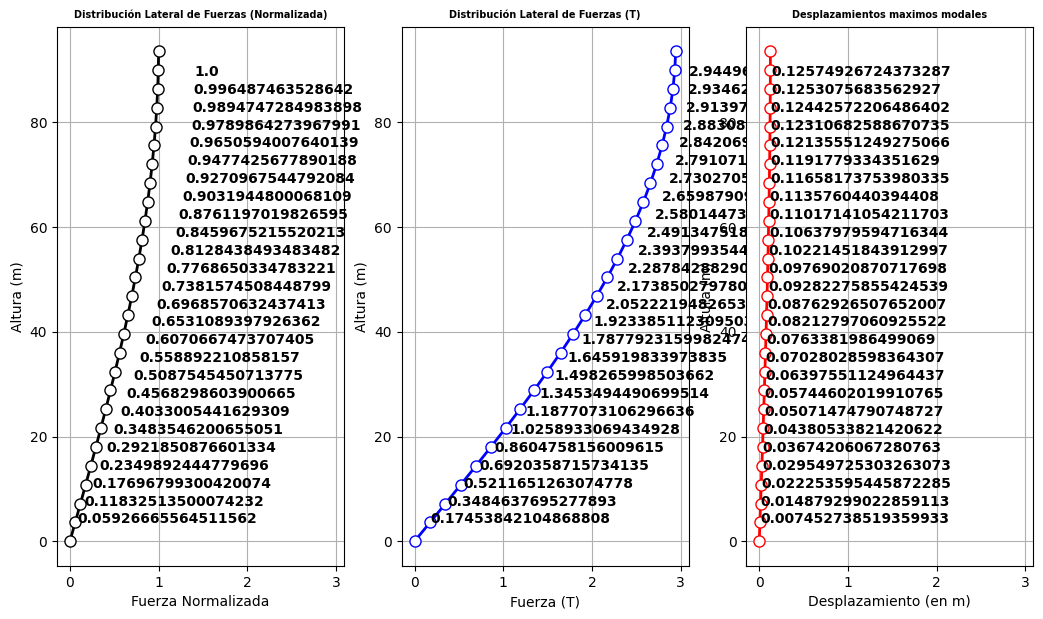

In [130]:
Hacum = np.zeros(gdl)
Hacum[0] = H[0]

for i in range(gdl):
    Hacum[i] = Hacum[i - 1] + H[i]

graf = np.zeros((gdl, 3))

for i in range(gdl):
    graf[i, 0] = F_n[i]
    graf[i, 1] = Hacum[i]
    graf[i, 2] = qmax[i,modo_vibracion]

graf = np.vstack(([0, 0, 0], graf))

escala = 7
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(escala*1.8, escala))

# First subplot
ax1.plot(graf[:, 0], graf[:, 1], '-ok', markersize=8, markerfacecolor='w', linewidth=2)
ax1.grid(True)
ax1.set_title('Distribución Lateral de Fuerzas (Normalizada)', fontweight='bold', fontsize=escala)
ax1.set_xlabel('Fuerza Normalizada')
ax1.set_ylabel('Altura (m)')

for i in range(len(graf) - 1):
    ax1.text(graf[i + 1, 0] * 1.4, graf[i + 1, 1] * 0.95, str(graf[i + 1, 0]), fontsize=10, fontweight='bold')


# Second subplot
ax2.plot(graf[:, 0] * F[-1,modo_vibracion], graf[:, 1], '-ob', markersize=8, markerfacecolor='w', linewidth=2)
ax2.grid(True)
ax2.set_title('Distribución Lateral de Fuerzas (T)', fontweight='bold', fontsize=escala)
ax2.set_xlabel('Fuerza (T)')
ax2.set_ylabel('Altura (m)')

for i in range(len(graf) - 1):
    ax2.text(graf[i + 1, 0] * F[-1,modo_vibracion] * 1.05, graf[i + 1, 1] * 0.95, str(graf[i + 1, 0] * F[-1,modo_vibracion]), fontsize=10, fontweight='bold')

# Third subplot
ax3.plot(graf[:, 2], graf[:, 1], '-or', markersize=8, markerfacecolor='w', linewidth=2)
ax3.grid(True)
ax3.set_title('Desplazamientos maximos modales', fontweight='bold', fontsize=escala)
ax3.set_xlabel('Desplazamiento (en m)')
ax3.set_ylabel('Altura (m)')

for i in range(len(graf) - 1):
    ax3.text(graf[i + 1, 2] * 1.05, graf[i + 1, 1] * 0.95, str(graf[i + 1, 2]), fontsize=10, fontweight='bold')

plt.show()

In [131]:
#Calculo de Derivas
Derivas = []
for i in range(gdl-1):
    Derivas.append((qmax[i+1,modo_vibracion]-qmax[i,modo_vibracion])/H[0]*100)

tbl_Derivas = pd.DataFrame(Derivas)
display(tbl_Derivas.style.set_caption('Derivas (%)'))

,0
0,0.206293
1,0.204842
2,0.202670
3,0.199787
4,0.196202
5,0.191928
6,0.186980
7,0.181375
8,0.175133
9,0.168275


In [132]:
c1 = 0.2
c2 = 0.3
num_columnas = 9
pisos = 3
altura_entrepiso = 3
print(f'vol_columnas20 es: {c1*c1*num_columnas*pisos*altura_entrepiso} m3')
print(f'vol_columnas30 es: {c2*c2*num_columnas*pisos*altura_entrepiso} m3')

vol_columnas20 es: 3.240000000000001 m3
vol_columnas30 es: 7.289999999999999 m3
